# Import required libraries

In [ ]:
!pip install arch -q

In [ ]:
import warnings

import numpy as np
import pandas as pd
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn import metrics

%matplotlib inline
warnings.filterwarnings("ignore")

# Import Data

In [ ]:
df = pd.read_csv(r'JPM.csv', parse_dates = True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,5.129630,5.018519,5.037037,1.122904,62775
1,1980-03-18,0.0,5.111111,5.037037,5.074074,1.131161,64125
2,1980-03-19,0.0,5.166667,5.111111,5.148148,1.147674,40500
3,1980-03-20,0.0,5.148148,5.092593,5.111111,1.139418,18900
4,1980-03-21,0.0,5.222222,5.111111,5.222222,1.164188,97200


# Functions for plotting PACF Graph and predicting volatility values

In [ ]:
def exp9(column_name,p,q):
  print("\n",column_name, "Graph")
  df[column_name].plot(figsize=(15, 6))
  plt.xlabel("Date")
  plt.ylabel(column_name)
  plt.title(column_name)
  plt.show()

  new_df = df[column_name]

  print("\nPACF Graph")
  plot_pacf(new_df)
  plt.show()

  test_size = 30
  train, test = new_df[:-test_size], new_df[-test_size:]

  model = arch_model(train, p=p, q=q)
  model_fit = model.fit()
  print(model_fit.summary())
  forecast = model_fit.forecast()
  # forecast = pd.DataFrame(forecast,columns=['close_pred'])
  return forecast

def predict_volatility(column_name, p, q):
  new_df = df[column_name]
  rolling_predictions = []
  test_size = 30

  for i in range(test_size):
    train = new_df[:-(test_size-i)]

    model = arch_model(train, p=p, q=q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

  rolling_predictions = pd.Series(rolling_predictions, index=new_df.index[-test_size:])
  # print(rolling_predictions)

  plt.figure(figsize=(10,4))
  true, = plt.plot(df[column_name][-test_size:])
  preds, = plt.plot(rolling_predictions)
  plt.title(f'Volatility Prediction - Rolling forecast for GARCH[{p}, {q}]', fontsize=20)
  plt.legend([ 'True Volatility', 'Predicted Volatility'], fontsize=16)
  return rolling_predictions

# For Column Close Values


 Close Graph


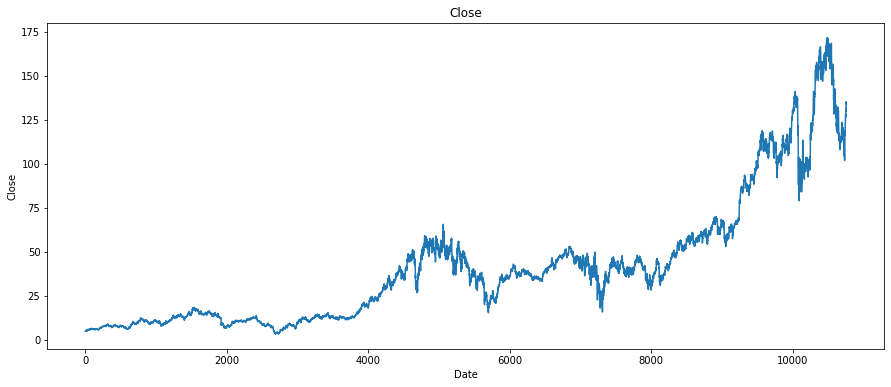


PACF Graph


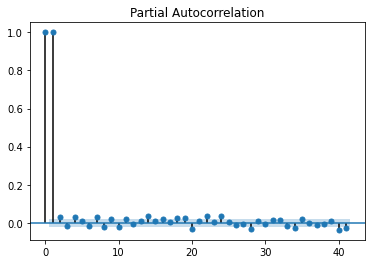

Iteration:      1,   Func. Count:      7,   Neg. LLF: 971634837.9790472
Iteration:      2,   Func. Count:     14,   Neg. LLF: 75912.31619518838
Iteration:      3,   Func. Count:     21,   Neg. LLF: 51369.79891089618
Iteration:      4,   Func. Count:     28,   Neg. LLF: 73720.39161077463
Iteration:      5,   Func. Count:     35,   Neg. LLF: 77843.29147833561
Iteration:      6,   Func. Count:     44,   Neg. LLF: 45282.768192604446
Iteration:      7,   Func. Count:     50,   Neg. LLF: 45360.51270444025
Iteration:      8,   Func. Count:     64,   Neg. LLF: 44664.398647641996
Iteration:      9,   Func. Count:     70,   Neg. LLF: 44594.733491257
Iteration:     10,   Func. Count:     76,   Neg. LLF: 44831.444649453086
Iteration:     11,   Func. Count:     84,   Neg. LLF: 44899.08135394215
Iteration:     12,   Func. Count:     91,   Neg. LLF: 44476.29727927128
Iteration:     13,   Func. Count:     97,   Neg. LLF: 44520.08624738909
Iteration:     14,   Func. Count:    104,   Neg. LLF: 44451.610

In [ ]:
forecast = exp9("Close", 1 ,2)
print("\nPredicting volatility")

<b>Model gives best prediction for P=1 and Q=2 in GARCH Model</b>

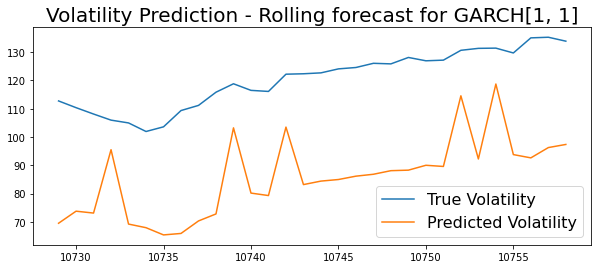

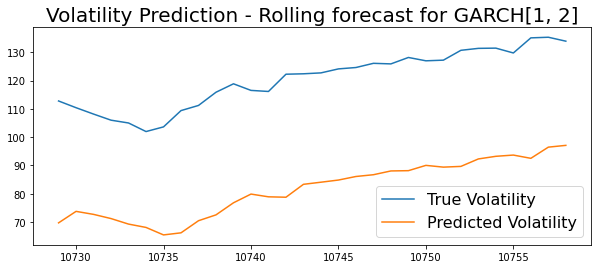

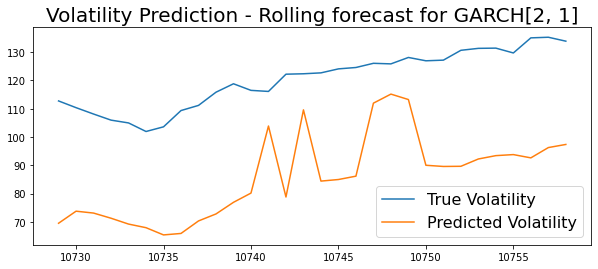

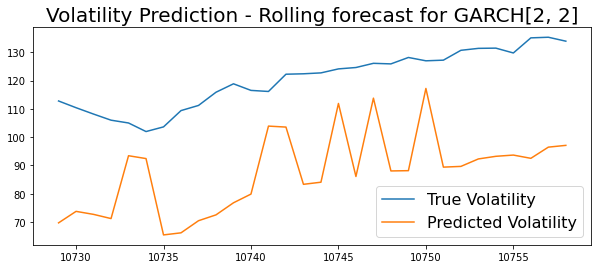

In [ ]:
for i in range(2):
  for j in range(2):
    predict_volatility("Close", i+1, j+1)

(30,)

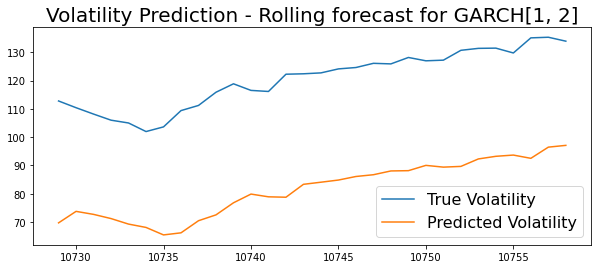

In [ ]:
forecast = predict_volatility("Close", 1, 2)
forecast.shape

In [ ]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

timeseries_evaluation_metrics_func(test, forecast)

Evaluation metric results:-
MSE is : 1514.5145875022415
MAE is : 38.82838152072339
RMSE is : 38.916764864287494
MAPE is : 31.758735330487763
R2 is : -14.401878805017143

